Import TensorFlow, tf.keras and helper libraries 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


Import MNIST digits dataset. It has 60k images of digits from 0 to 9 in 28x28 shape with values of pixels from 0 to 255

In [2]:
digits_mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = digits_mnist.load_data()

Each image is mapped to a single label. Class names are not included in dataset, so declare a variable with it

In [3]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

Check the number of images, shapes and labels

In [4]:
print('Train data shape:', format(x_train.shape))
print('Train data labels length:', format(len(y_train)))
print('Train data labels value:', format(y_train))

print('\nTest data shape:', format(x_test.shape))
print('Test data labels length:', format(len(y_test)))
print('Test data labels value:', format(y_test))

Train data shape: (60000, 28, 28)
Train data labels length: 60000
Train data labels value: [5 0 4 ... 5 6 8]

Test data shape: (10000, 28, 28)
Test data labels length: 10000
Test data labels value: [7 2 1 ... 4 5 6]


Preprocess data from the range of 0 to 255 to the range of 0 to 1.0

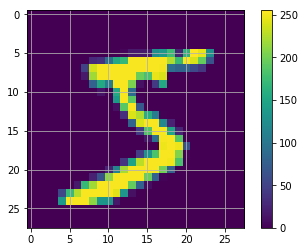

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(True)
plt.show()

x_train, x_test = x_train / 255.0, x_test / 255.0

Display the first 25 images from the training set and display the class name below it

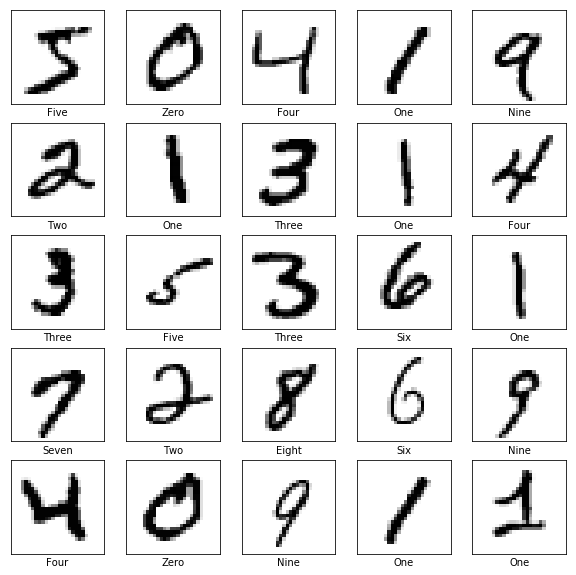

In [6]:
plt.figure(figsize=(10, 10))
for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Build the model 

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


Compile the model. 
#Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
#Optimizer —This is how the model is updated based on the data it sees and its loss function.
#Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Train the model for 5 epochs

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2637 - acc: 0.9247
Epoch 2/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.1161 - acc: 0.9664
Epoch 3/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0798 - acc: 0.9764
Epoch 4/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0589 - acc: 0.9817
Epoch 5/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0456 - acc: 0.9858


Check accuracy

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 81us/sample - loss: 0.0735 - acc: 0.9757
Test accuracy: 0.9757


Get prediction for the test image #0

In [11]:
predictions = model.predict(x_test)
print('Values of prediction', predictions[0])
print('Number of max class prediction:', np.argmax(predictions[0]))
print('Name of class prediction:', class_names[np.argmax(predictions[0])])

Values of prediction [2.8148432e-09 1.3692649e-09 9.4803124e-07 7.4118648e-06 2.0497881e-11
 1.3629332e-09 4.2367975e-13 9.9999142e-01 2.5402407e-09 1.9393370e-07]
Number of max class prediction: 7
Name of class prediction: Seven


Simple function for drawing the results of prediction

In [12]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100 * np.max(predictions_array),
                                         class_names[true_label],
                                         color=color))

In [13]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

Look again to the first image, with results

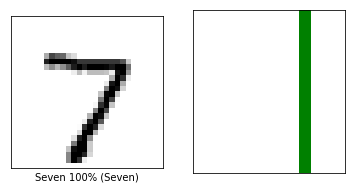

In [14]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)
plt.show()

Plot several images' results

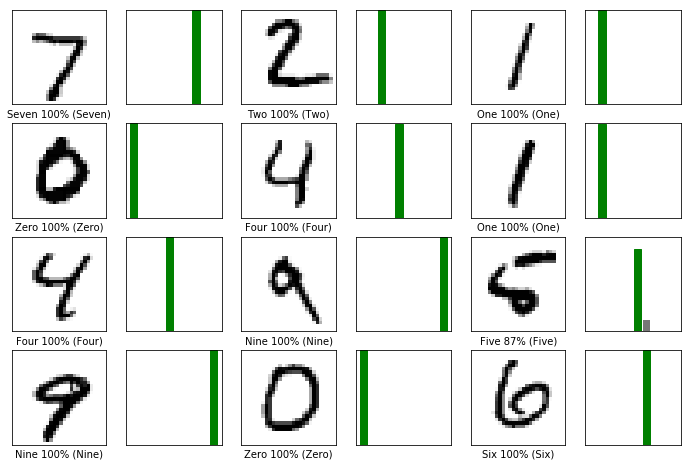

In [15]:
num_rows = 4
num_cols = 3
num_images= num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.show()
